In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
national_data = pd.read_csv("indian-national-level-election.csv")
national_data.head(5)

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [7]:
national_data.shape

(73081, 11)

In [8]:
national_data.describe()

,year,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,73081.000000,7.308100e+04
mean,1996.779505,22.311490,49834.760266,1.122277e+06
std,10.432527,19.039793,104893.319706,3.560049e+05
min,1977.000000,1.000000,0.000000,1.947100e+04
25%,1989.000000,7.000000,872.000000,9.129850e+05
50%,1996.000000,18.000000,2743.000000,1.099503e+06
75%,2004.000000,33.000000,19185.000000,1.329086e+06
max,2014.000000,85.000000,863358.000000,3.368399e+06


In [9]:
national_data.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

In [10]:
national_data.isna() .sum()

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [15]:
national_data.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [16]:
data_2014 = national_data[national_data['year'] == 2014]
up_data_2014 = data_2014[data_2014['st_name'] =='Uttar Pradesh']
up_data_2014_max_voted_party = up_data_2014.groupby('partyabbre')['totvotpoll'].sum()
up_data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
up_data_2014_max_voted_party = up_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
up_data_2014_top5_max_voted_party = up_data_2014_max_voted_party.head(5)
up_data_2014_top5_max_voted_party = up_data_2014_top5_max_voted_party.reset_index()
up_data_2014_top5_max_voted_party 

,partyabbre,totvotpoll
0,BJP,34318854
1,SP,17988967
2,BSP,15914194
3,INC,6061267
4,IND,1414869


<BarContainer object of 5 artists>

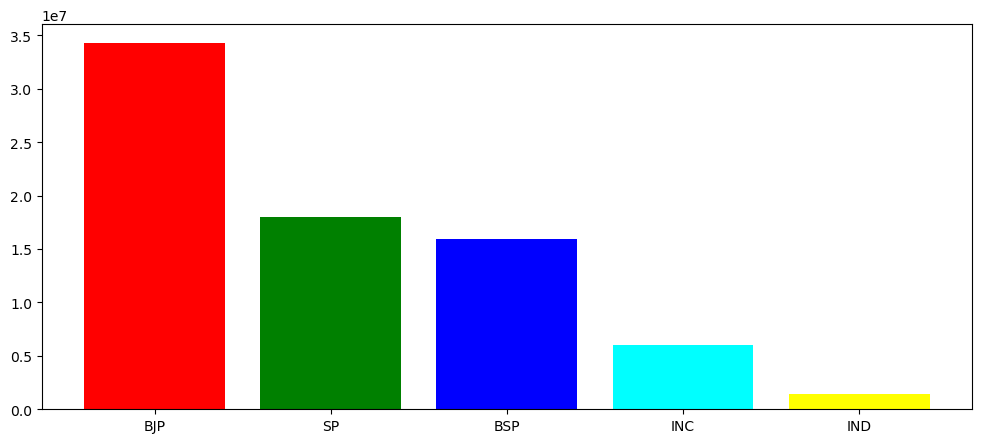

In [17]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2014_top5_max_voted_party['partyabbre'],up_data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

In [18]:
data_2014 = national_data[national_data['year'] == 2014]
mh_data_2014 = data_2014[data_2014['st_name'] =='Maharashtra']
mh_data_2014_max_voted_party = mh_data_2014.groupby('partyabbre')['totvotpoll'].sum()
mh_data_2014_max_voted_party = pd.DataFrame(mh_data_2014_max_voted_party)
mh_data_2014_max_voted_party = mh_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
mh_data_2014_top5_max_voted_party = mh_data_2014_max_voted_party.head(5)
mh_data_2014_top5_max_voted_party 

,totvotpoll
partyabbre,
BJP,13308961
SHS,10050652
INC,8830190
NCP,7782275
IND,1577114


<BarContainer object of 5 artists>

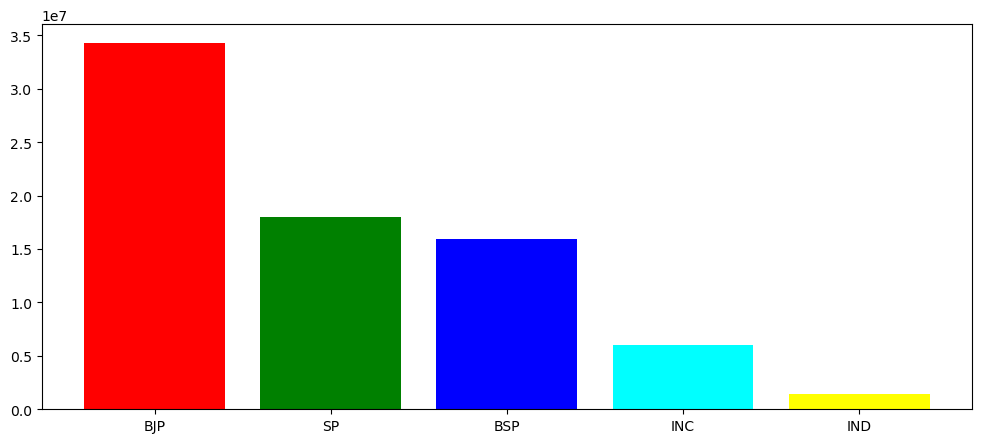

In [19]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2014_top5_max_voted_party['partyabbre'],up_data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

In [20]:
yearwise_partywise_total_votes = national_data.groupby(['year','partyabbre'])['totvotpoll'].sum()
yearwise_partywise_total_votes = pd.DataFrame(yearwise_partywise_total_votes).reset_index()
years = yearwise_partywise_total_votes['year'].unique()
yearwise_partywise_total_votes_again = {}
for year in list(years):
    yearwise_partywise_total_votes_again['year_' + f'{year}'] = yearwise_partywise_total_votes[yearwise_partywise_total_votes['year'] == year].sort_values(by = 'totvotpoll',ascending= False).head(8)

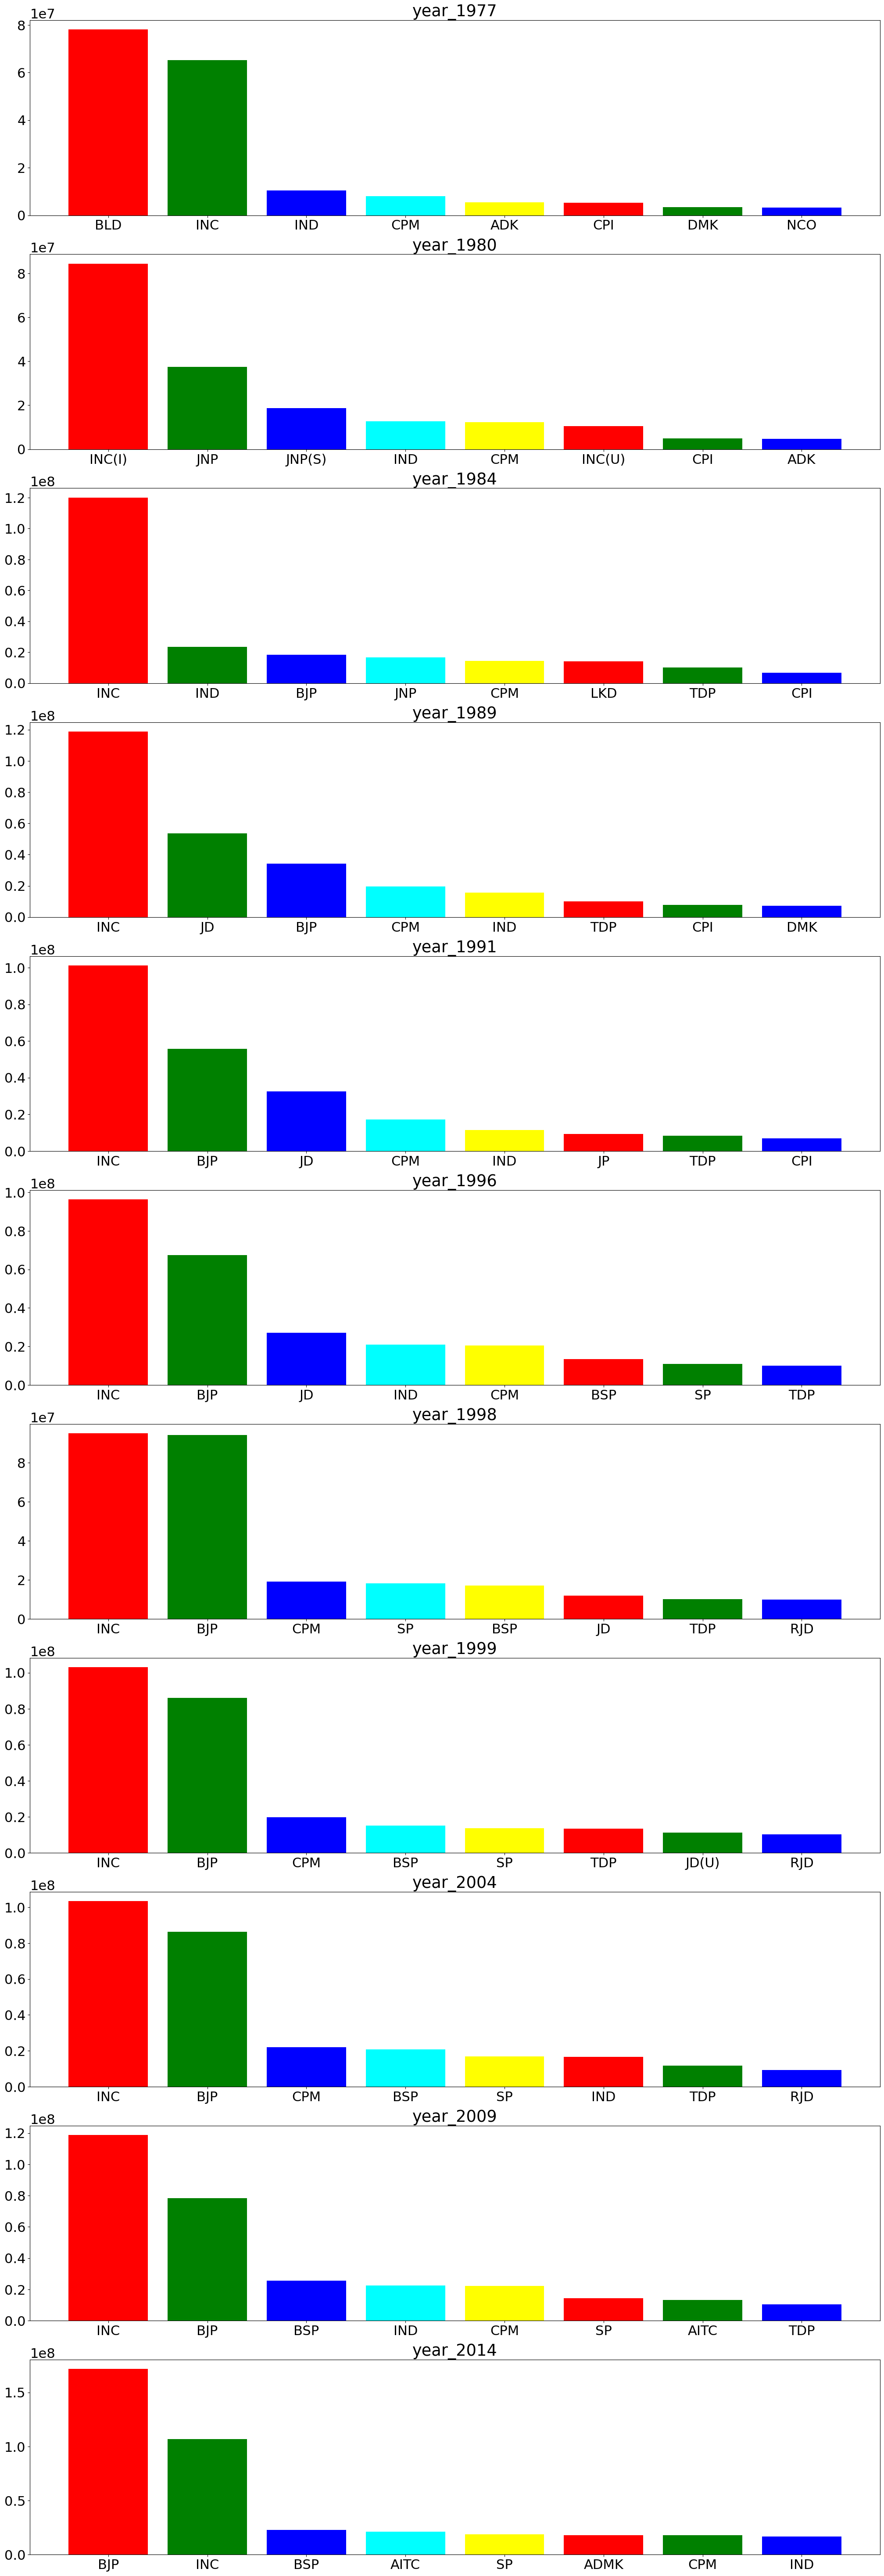

In [21]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value)  in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['partyabbre'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title(key)